## Terrorism Trends and Patterns

### a. Worst Year

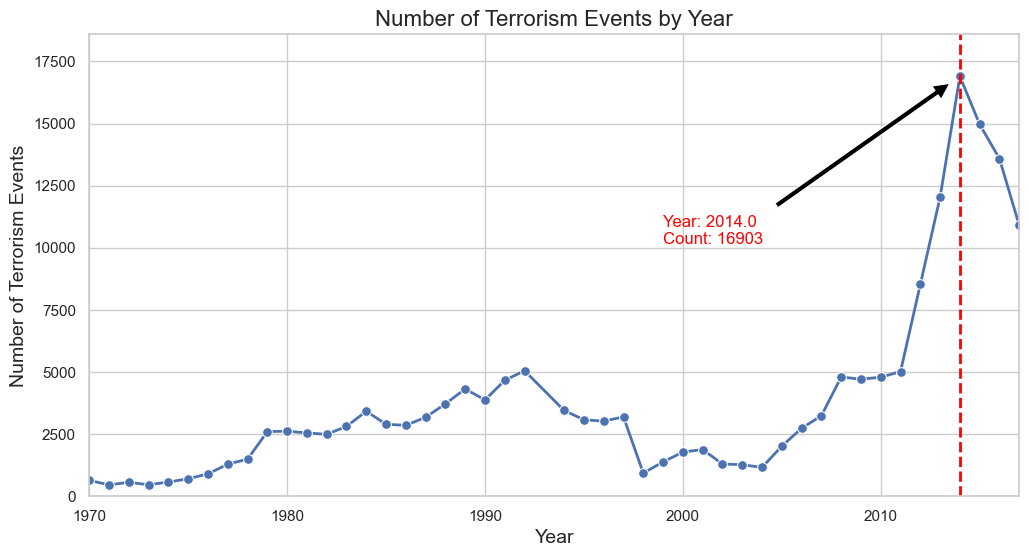

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y', errors='coerce')

# Group the data by year and count the number of events
year_counts = data['date'].dt.year.value_counts().sort_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o", linewidth=2, markersize=7)

# Add labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Terrorism Events', fontsize=14)
plt.title('Number of Terrorism Events by Year', fontsize=16)

# Set x-axis and y-axis limits
plt.xlim(year_counts.index.min(), year_counts.index.max())
plt.ylim(0, year_counts.values.max() * 1.1)

# Highlight the year with the highest number of terrorism events
max_year = year_counts.idxmax()
max_count = year_counts[max_year]
plt.axvline(max_year, color='red', linestyle='--', lw=2)
plt.annotate(f"Year: {max_year}\nCount: {max_count}", xy=(max_year, max_count), xytext=(max_year - 15, max_count * 0.6),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red')

plt.savefig('Number of Terrorism Events by Year.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [2]:
import pandas as pd

data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y', errors='coerce')

# Group the data by year and count the number of events
year_counts = data['date'].dt.year.value_counts().sort_index()

# Create a DataFrame with the year_counts data
year_counts_df = pd.DataFrame({'Year': year_counts.index, 'Number of Terrorism Events': year_counts.values})

# Display the DataFrame
print(year_counts_df)

      Year  Number of Terrorism Events
0   1970.0                         636
1   1971.0                         461
2   1972.0                         561
3   1973.0                         463
4   1974.0                         572
5   1975.0                         703
6   1976.0                         900
7   1977.0                        1292
8   1978.0                        1493
9   1979.0                        2601
10  1980.0                        2620
11  1981.0                        2548
12  1982.0                        2492
13  1983.0                        2810
14  1984.0                        3422
15  1985.0                        2897
16  1986.0                        2854
17  1987.0                        3179
18  1988.0                        3720
19  1989.0                        4319
20  1990.0                        3876
21  1991.0                        4666
22  1992.0                        5053
23  1994.0                        3452
24  1995.0               

### b. Number of Deaths per Attack

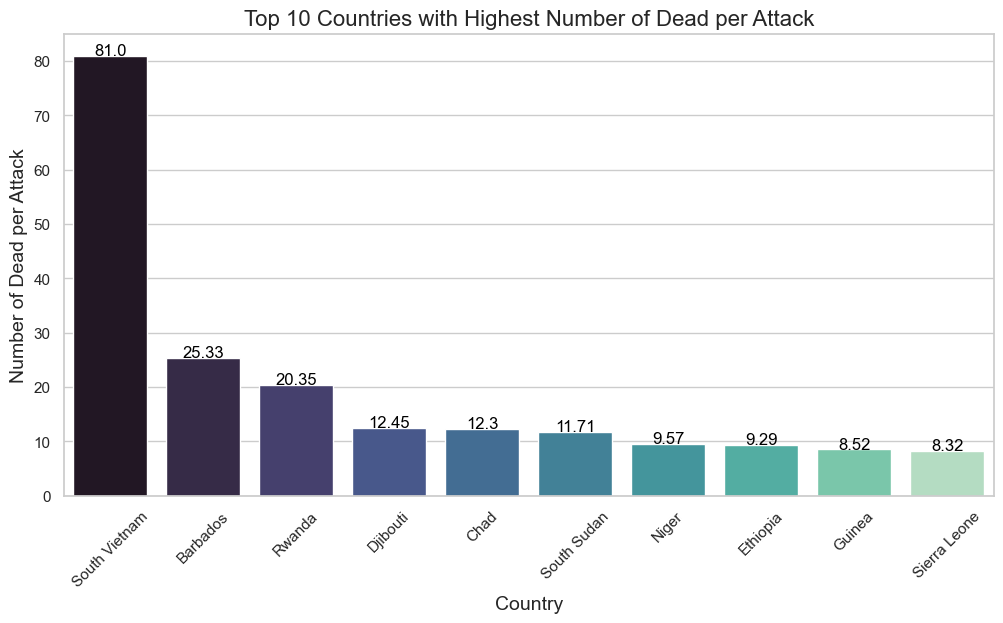

         Country  Number of Dead per Attack
0  South Vietnam                  81.000000
1       Barbados                  25.333333
2         Rwanda                  20.352201
3       Djibouti                  12.454545
4           Chad                  12.296703
5    South Sudan                  11.706667
6          Niger                   9.571429
7       Ethiopia                   9.289474
8         Guinea                   8.520000
9   Sierra Leone                   8.316832


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Calculate total number of deaths per country
deaths_per_country = data.groupby('country_txt')['nkill'].sum()

# Calculate total number of attacks per country
attacks_per_country = data['country_txt'].value_counts()

# Calculate number of dead per attack for each country
dead_per_attack = deaths_per_country / attacks_per_country

# Get the top 10 countries with the highest number of dead per attack
top_10_countries = dead_per_attack.sort_values(ascending=False).head(10)

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="mako")

# Add labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Dead per Attack', fontsize=14)
plt.title('Top 10 Countries with Highest Number of Dead per Attack', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add values on top of the bars
for i, v in enumerate(top_10_countries.values):
    ax.text(i, v + 0.1, str(round(v, 2)), ha='center', fontsize=12, color='black')

    
plt.savefig('Top 10 Countries with Highest Number of Dead per Attack.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Tabulate the findings
top_10_countries_table = top_10_countries.reset_index()
top_10_countries_table.columns = ['Country', 'Number of Dead per Attack']
print(top_10_countries_table)

### c. Top 5 Countries with the Most Deaths

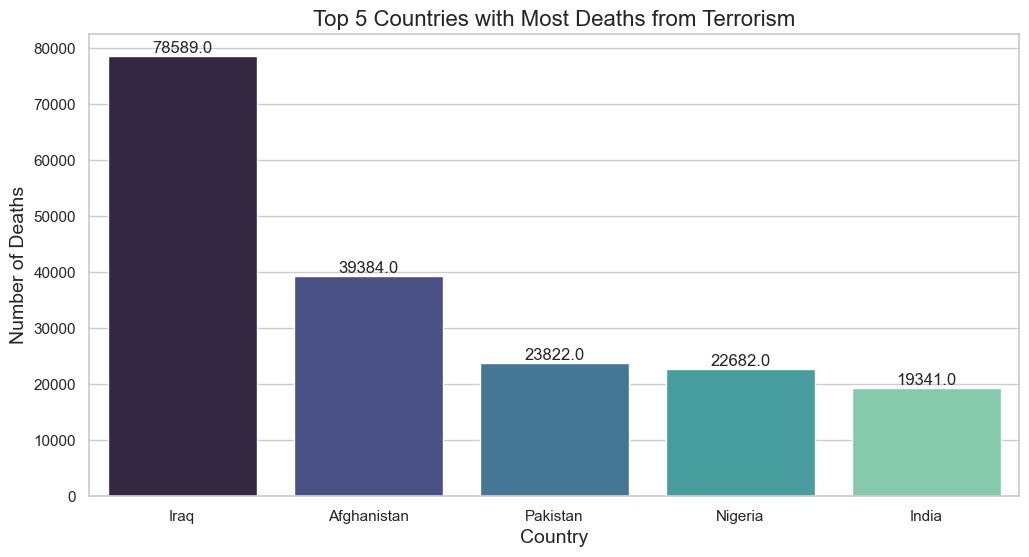

       Country  Number of Deaths
0         Iraq           78589.0
1  Afghanistan           39384.0
2     Pakistan           23822.0
3      Nigeria           22682.0
4        India           19341.0


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('PerpsAdded.csv', encoding='ISO-8859-1', low_memory=False, sep=';')

# Calculate the top 5 countries with the most deaths from terrorism
top_5_countries_deaths = data.groupby('country_txt')['nkill'].sum().nlargest(5)

# Now you can use the previous code to create the bar plot and save it as a PNG file
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_5_countries_deaths.index, y=top_5_countries_deaths.values, palette="mako")

# Add labels and title
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.title('Top 5 Countries with Most Deaths from Terrorism', fontsize=16)

# Display the values above the bars
for index, value in enumerate(top_5_countries_deaths.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Save the plot as a PNG file
plt.savefig('top_5_countries_deaths.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Display findings in a tabular format
top_5_deaths_table = pd.DataFrame({"Country": top_5_countries_deaths.index,
                                   "Number of Deaths": top_5_countries_deaths.values})
print(top_5_deaths_table)

### d. Comparative Analysis of Terrorism Intensity: Top 5 Countries and Global Patterns

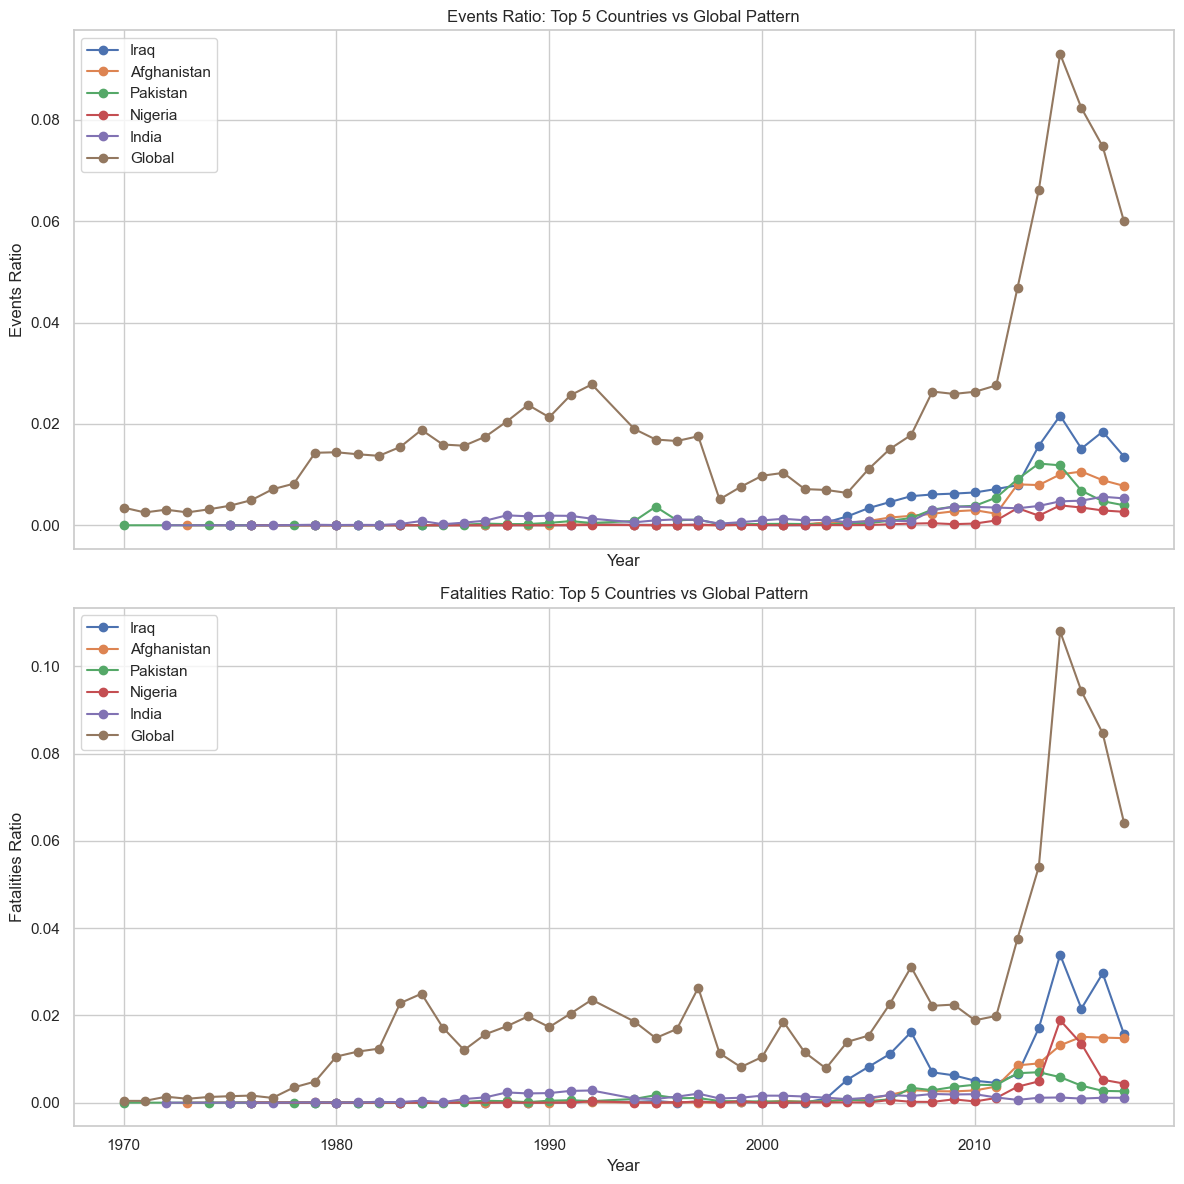

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')  # Convert the 'date' column to datetime format

global_events = data['ï»¿eventid'].count()
global_fatalities = data['nkill'].sum()

global_events_ratio = data.groupby(data['date'].dt.year)['ï»¿eventid'].count() / global_events
global_fatalities_ratio = data.groupby(data['date'].dt.year)['nkill'].sum() / global_fatalities

global_ratios = pd.DataFrame({'Year': global_events_ratio.index,
                               'Country': 'Global',
                               'Events Ratio': global_events_ratio.values,
                               'Fatalities Ratio': global_fatalities_ratio.values})

top_5_ratios = pd.DataFrame(columns=['Year', 'Country', 'Events Ratio', 'Fatalities Ratio'])

for country in top_5_countries_deaths.index:
    country_data = data[data['country_txt'] == country]
    country_events = country_data.groupby(country_data['date'].dt.year)['ï»¿eventid'].count()
    country_fatalities = country_data.groupby(country_data['date'].dt.year)['nkill'].sum()
    
    country_events_ratio = country_events / global_events
    country_fatalities_ratio = country_fatalities / global_fatalities
    
    country_ratios = pd.DataFrame({'Year': country_events_ratio.index,
                                   'Country': country,
                                   'Events Ratio': country_events_ratio.values,
                                   'Fatalities Ratio': country_fatalities_ratio.values})
    top_5_ratios = pd.concat([top_5_ratios, country_ratios], ignore_index=True)

all_ratios = pd.concat([top_5_ratios, global_ratios], ignore_index=True)

fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

for country in all_ratios['Country'].unique():
    country_data = all_ratios[all_ratios['Country'] == country]
    axes[0].plot(country_data['Year'], country_data['Events Ratio'], marker='o', label=country)
    axes[1].plot(country_data['Year'], country_data['Fatalities Ratio'], marker='o', label=country)

axes[0].set(title='Events Ratio: Top 5 Countries vs Global Pattern', ylabel='Events Ratio')
axes[1].set(title='Fatalities Ratio: Top 5 Countries vs Global Pattern', xlabel='Year', ylabel='Fatalities Ratio')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')

axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig('terrorism_ratios_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Tabulate the findings
events_ratio_table = top_5_ratios.pivot_table(index=['Year'], columns='Country', values='Events Ratio', margins=True)
events_ratio_table.fillna(0, inplace=True)

fatalities_ratio_table = top_5_ratios.pivot_table(index=['Year'], columns='Country', values='Fatalities Ratio', margins=True)
fatalities_ratio_table.fillna(0, inplace=True)

# Display the tables
print("Top 5 Countries and Global Patterns\n")
print("Events Ratio:\n", events_ratio_table)
print("\nFatalities Ratio:\n", fatalities_ratio_table)

Top 5 Countries and Global Patterns

Events Ratio:
 Country  Afghanistan     India      Iraq   Nigeria  Pakistan       All
Year                                                                  
1970.0      0.000000  0.000000  0.000000  0.000000  0.000006  0.000006
1972.0      0.000000  0.000006  0.000000  0.000000  0.000000  0.000006
1973.0      0.000006  0.000000  0.000000  0.000000  0.000000  0.000006
1974.0      0.000000  0.000000  0.000000  0.000000  0.000011  0.000011
1975.0      0.000000  0.000006  0.000006  0.000000  0.000006  0.000006
1976.0      0.000000  0.000006  0.000017  0.000006  0.000017  0.000011
1977.0      0.000000  0.000006  0.000000  0.000000  0.000000  0.000006
1978.0      0.000000  0.000000  0.000000  0.000000  0.000011  0.000011
1979.0      0.000017  0.000110  0.000011  0.000000  0.000039  0.000044
1980.0      0.000000  0.000055  0.000028  0.000006  0.000006  0.000023
1981.0      0.000000  0.000088  0.000011  0.000000  0.000022  0.000040
1982.0      0.000000  0.0

## Deadliest Terrorist Groups

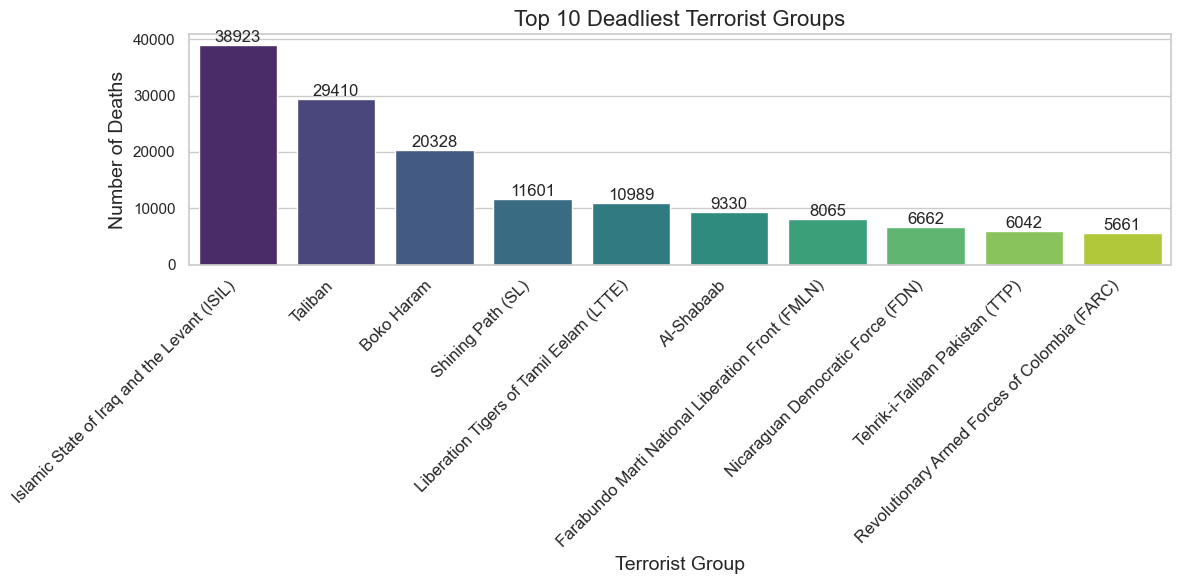

                                              gname  Number of Deaths
0       Islamic State of Iraq and the Levant (ISIL)           38923.0
1                                           Taliban           29410.0
2                                        Boko Haram           20328.0
3                                 Shining Path (SL)           11601.0
4           Liberation Tigers of Tamil Eelam (LTTE)           10989.0
5                                        Al-Shabaab            9330.0
6  Farabundo Marti National Liberation Front (FMLN)            8065.0
7                 Nicaraguan Democratic Force (FDN)            6662.0
8                   Tehrik-i-Taliban Pakistan (TTP)            6042.0
9     Revolutionary Armed Forces of Colombia (FARC)            5661.0


In [7]:
# Dropping the rows where 'gname' is Unknown
data = data[data['gname'] != 'Unknown']

# Group the dataset
grouped_data = data.groupby('gname')['nkill'].sum()

# Sort the data in descending order
top_deadliest_groups = grouped_data.sort_values(ascending=False).head(10)

# Set a style for the plot
sns.set_style("whitegrid")

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_deadliest_groups.index, y=top_deadliest_groups.values, palette='viridis')
plt.title('Top 10 Deadliest Terrorist Groups', fontsize=16)
plt.xlabel('Terrorist Group', fontsize=14)
plt.ylabel('Number of Deaths', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add values on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('Top 10 Deadliest Terrorist Groups.png', dpi=300, bbox_inches='tight')
plt.show()

# Tabulate the findings
top_deadliest_groups_df = top_deadliest_groups.reset_index().rename(columns={'nkill': 'Number of Deaths'})
print(top_deadliest_groups_df)